In [79]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

In [15]:
match_data = pd.read_csv('..\\Data\\matchData2.csv')

In [16]:
game_duration = match_data['gameDuration']
match_data = match_data.drop(['gameDuration'], axis=1)
match_data = match_data.drop(['firstBaronTeam1'], axis=1)
match_data = match_data.drop(['firstBaronTeam2'], axis=1)
match_data = match_data.drop(['win_team1'], axis=1)
match_data = match_data.drop(['win_team2'], axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(match_data, game_duration, test_size=0.2, random_state=42)

In [44]:
# Crea el modelo de Gradient Boosting Regressor
model = HistGradientBoostingRegressor(max_iter=100, random_state=42)
model.fit(X_train, y_train)

HistGradientBoostingRegressor(random_state=42)

In [45]:
# Realiza predicciones en el conjunto de prueba y de entrenamiento
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

In [46]:
# Evalúa el rendimiento del modelo
mse_test = mean_squared_error(y_test, test_predictions)
mse_train = mean_squared_error(y_train, train_predictions)


In [47]:
# Muestra los resultados
print('MSE en el conjunto de entrenamiento: ', mse_train)
print('MSE en el conjunto de prueba: ', mse_test)

MSE en el conjunto de entrenamiento:  105908.86213743912
MSE en el conjunto de prueba:  111870.40856786414


# Gráficos

## Diagrama de dispersión entre duración real y predicha

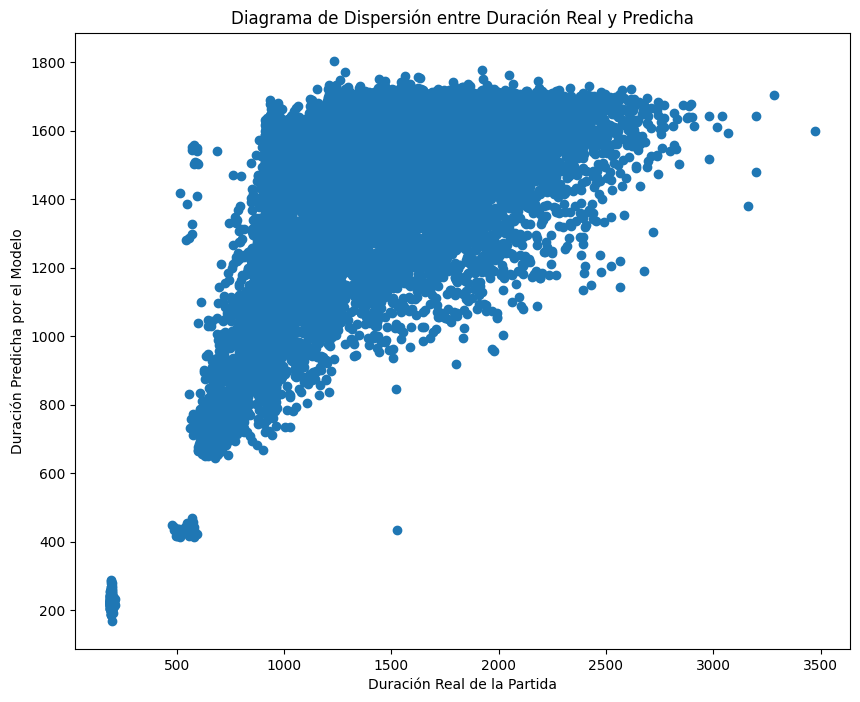

In [53]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, test_predictions)
plt.xlabel("Duración Real de la Partida")
plt.ylabel("Duración Predicha por el Modelo")
plt.title("Diagrama de Dispersión entre Duración Real y Predicha")
plt.show()

## Histograma de errores

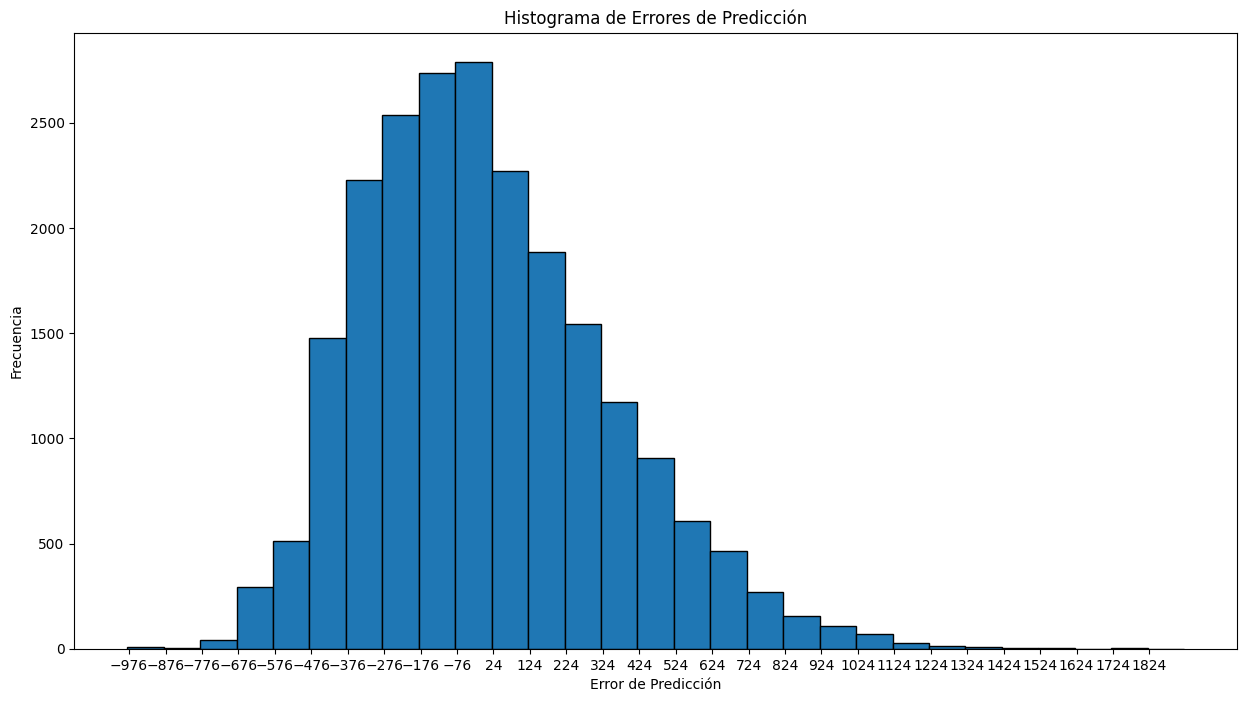

In [78]:
# Crear una figura con un tamaño específico
plt.figure(figsize=(15, 8))

# Calcular los errores de predicción
errors = y_test - test_predictions

# Crear el histograma con bins específicos y bordes del bin
bin_edges = np.arange(min(errors), max(errors) + 100, 100)
plt.hist(errors, bins=bin_edges, edgecolor='black')

# Establecer ticks en el centro de cada bin
plt.xticks(bin_edges[:-1] + 5)

plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.title("Histograma de Errores de Predicción")

# Mostrar el gráfico
plt.show()


## Curva de aprendizaje

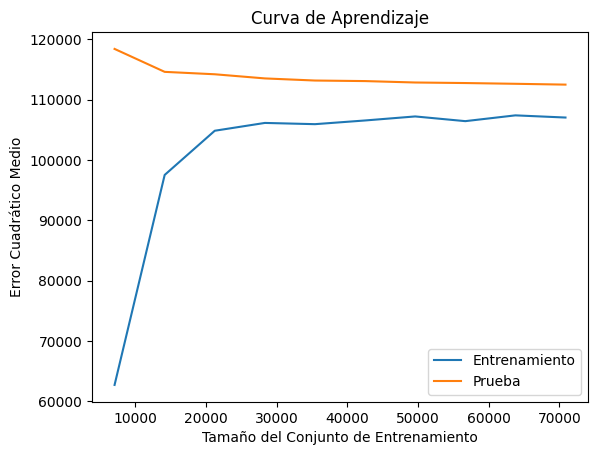

In [82]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1, 10), random_state=42)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, -train_scores_mean, label='Entrenamiento')
plt.plot(train_sizes, -test_scores_mean, label='Prueba')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio')
plt.title('Curva de Aprendizaje')
plt.legend()
plt.show()

In [22]:
# Obtiene la importancia de cada característica y las grafica
feature_importances = model.feature_importances_
feature_names = match_data.columns
feature_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_df.sort_values(by='importance', inplace=True)
feature_df.plot(x='feature', y='importance', kind='barh', legend=False, figsize=(10, 15))
plt.title('Gradient Boosting Regressor. Feature Importance')
plt.xlabel('importance')
plt.ylabel('feature')

AttributeError: 'HistGradientBoostingRegressor' object has no attribute 'feature_importances_'